In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


In [3]:


import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/kaggle/input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
import seaborn as sns

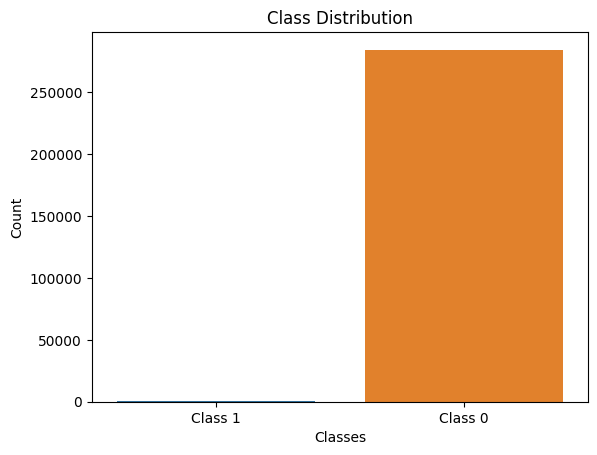

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


target = df['Class']

class_counts = [target[target == 1].count(), target[target == 0].count()]
class_labels = ['Class 1', 'Class 0'] 


sns.barplot(x=class_labels, y=class_counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


<Axes: xlabel='Time', ylabel='Amount'>

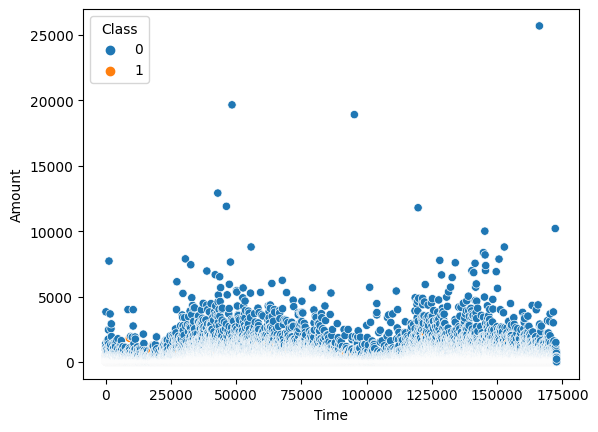

In [10]:
sns.scatterplot(data=df,x=df['Time'],y=df['Amount'],hue=target)

<Axes: ylabel='Density'>

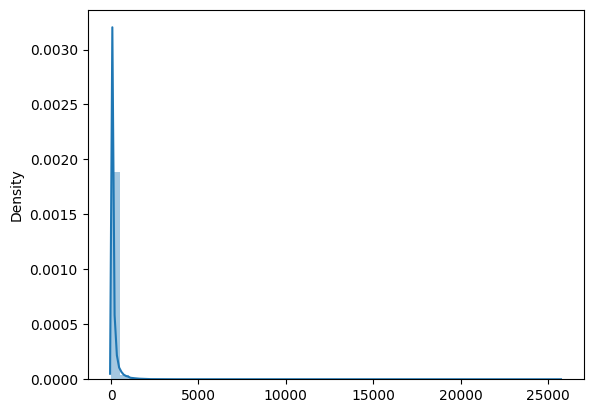

In [11]:
amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val)

In [12]:
from sklearn.utils import resample

major_class = df[df['Class'] == 0]
min_class = df[df['Class'] == 1]

undersampled_majority = resample(major_class, 
                                 replace=False, 
                                 n_samples=len(min_class),  
                                 random_state=42)  

new_df = pd.concat([undersampled_majority, min_class])

new_df['Class'].value_counts()


Class
0    492
1    492
Name: count, dtype: int64

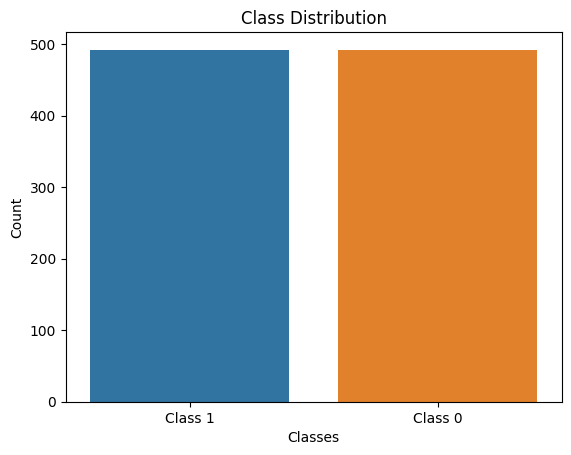

In [13]:
target = new_df['Class']

class_counts = [target[target == 1].count(), target[target == 0].count()]
class_labels = ['Class 1', 'Class 0'] 


sns.barplot(x=class_labels, y=class_counts)
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

<Axes: xlabel='Time', ylabel='Amount'>

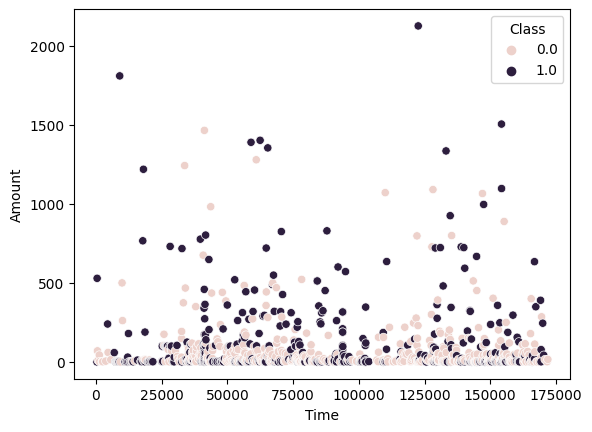

In [14]:
sns.scatterplot(data=new_df,x=df['Time'],y=df['Amount'],hue=target)

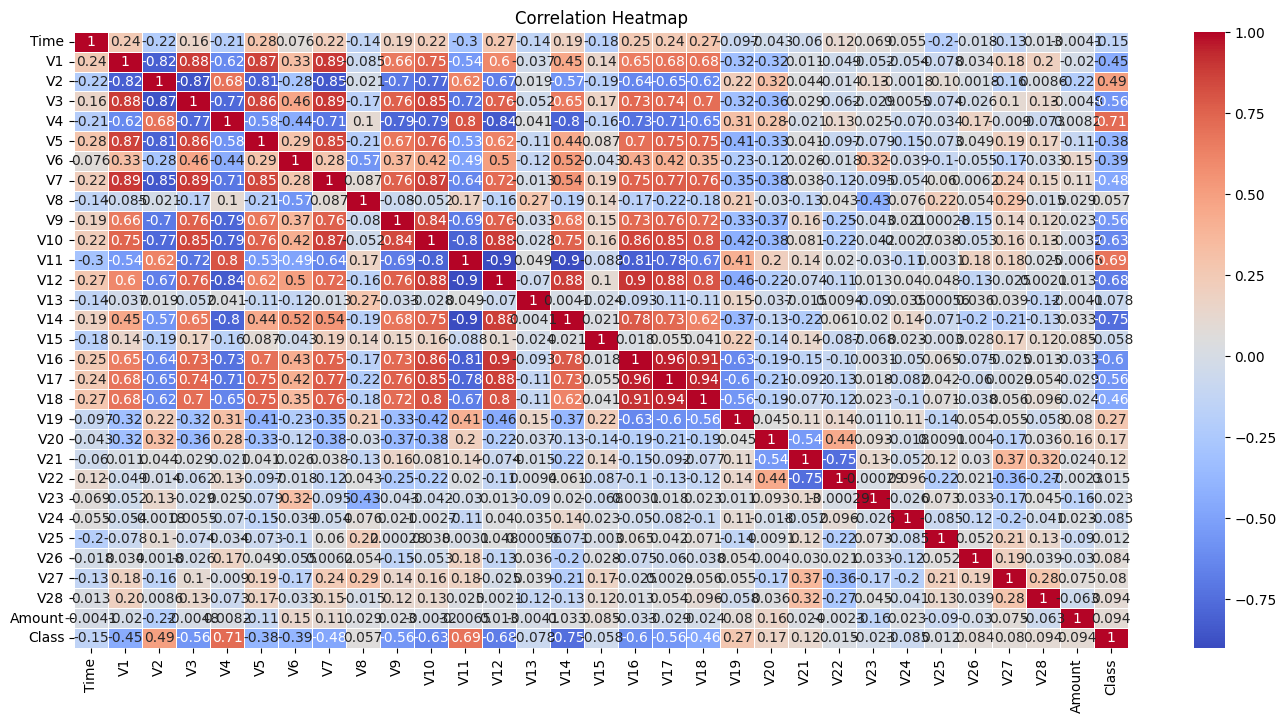

In [15]:
import matplotlib.pyplot as plt
correlation_matrix = new_df.corr()
plt.figure(figsize=(17, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


<Axes: >

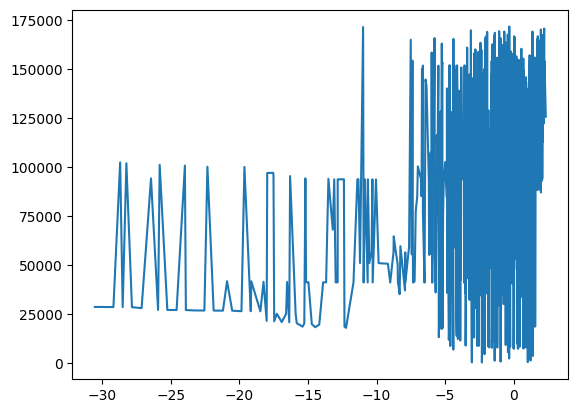

In [16]:
sns.lineplot(data=new_df,x=new_df['V1'].values,y=new_df['Time'].values)

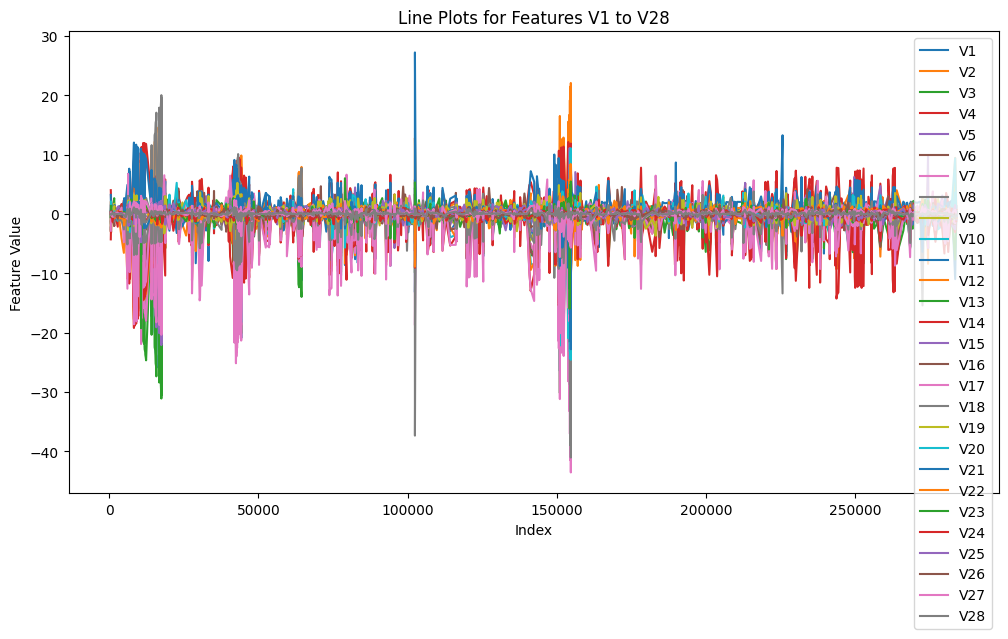

In [17]:
plt.figure(figsize=(12, 6))

for col in new_df.columns[1:-2]:  
    sns.lineplot(data=new_df, x=new_df.index, y=new_df[col], label=col)

plt.title('Line Plots for Features V1 to V28')
plt.xlabel('Index')
plt.ylabel('Feature Value')
plt.legend(loc='upper right') 
plt.show()


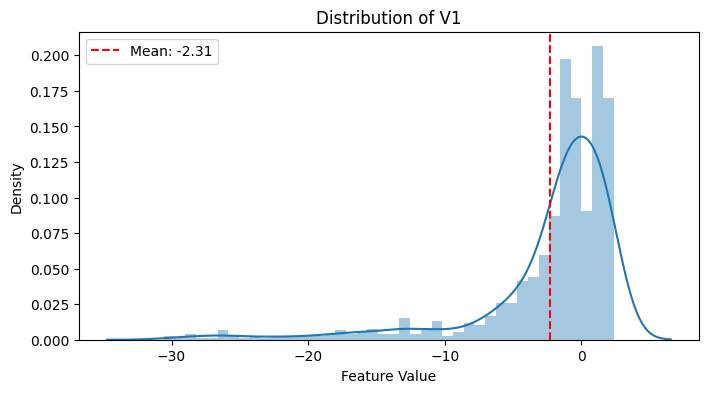

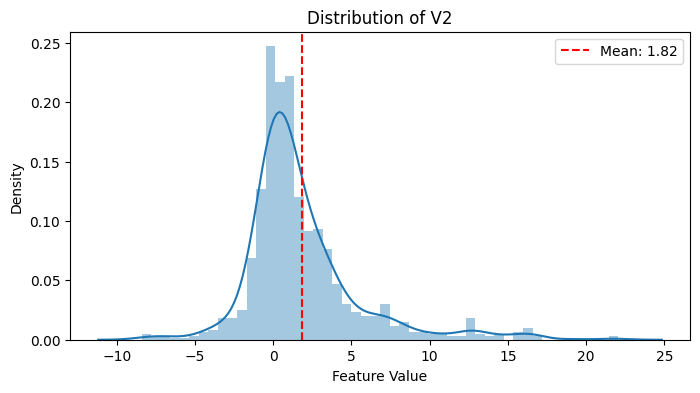

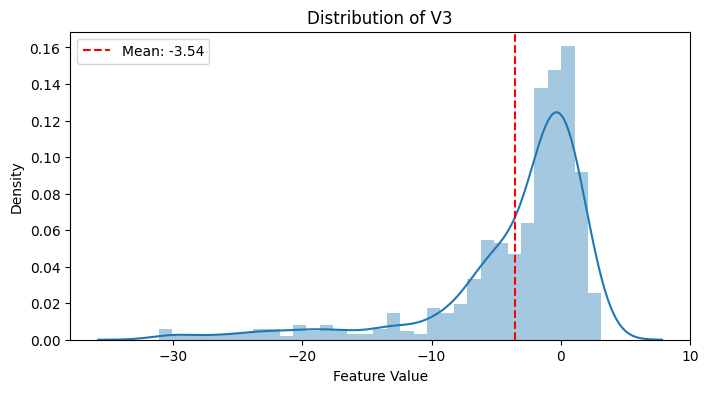

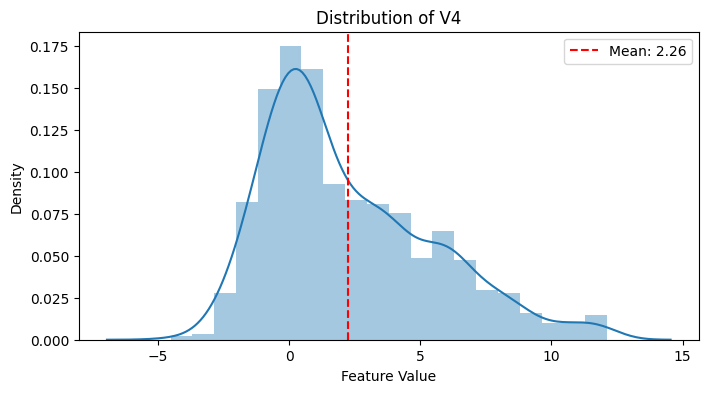

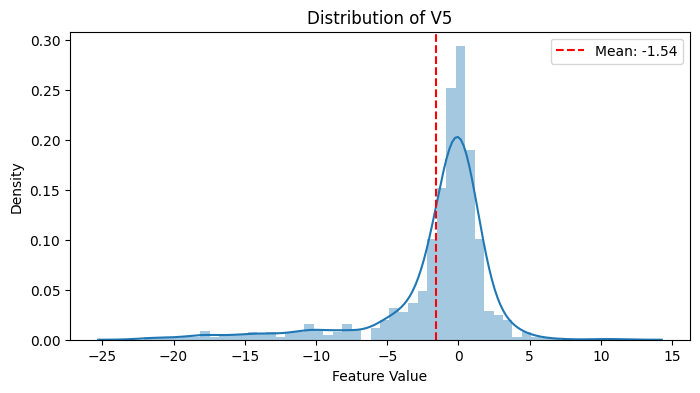

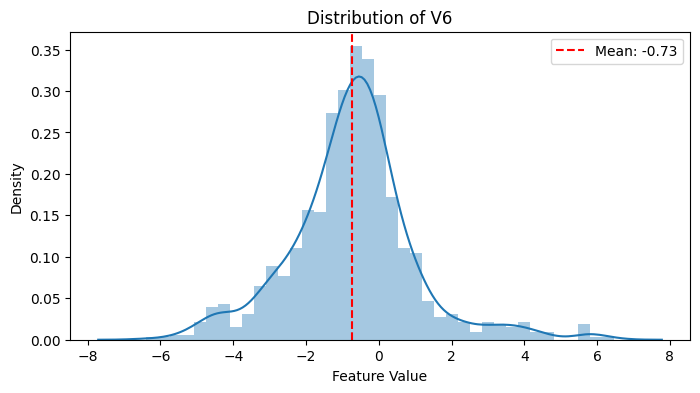

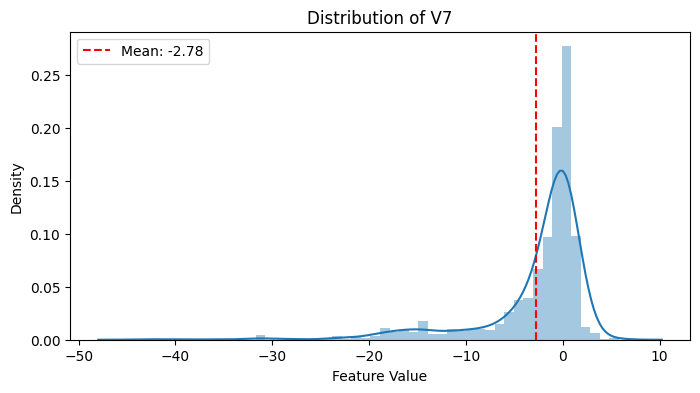

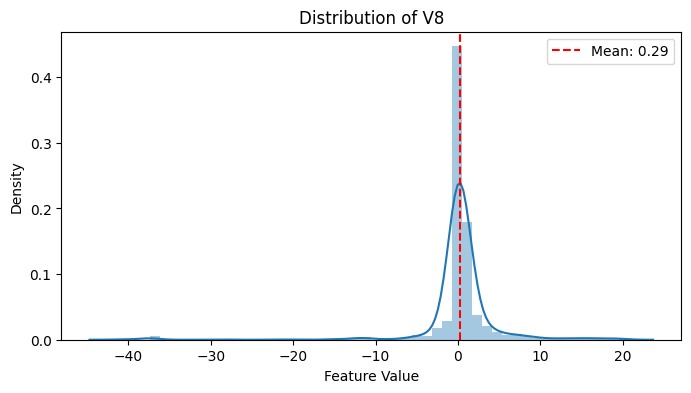

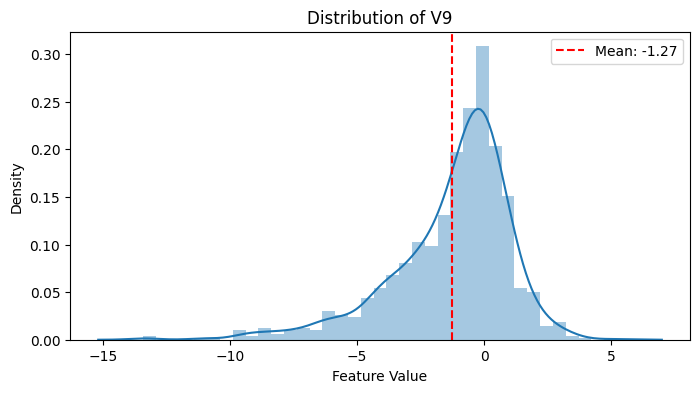

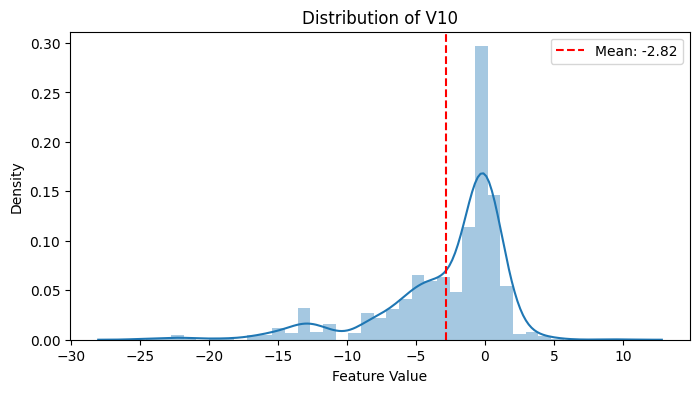

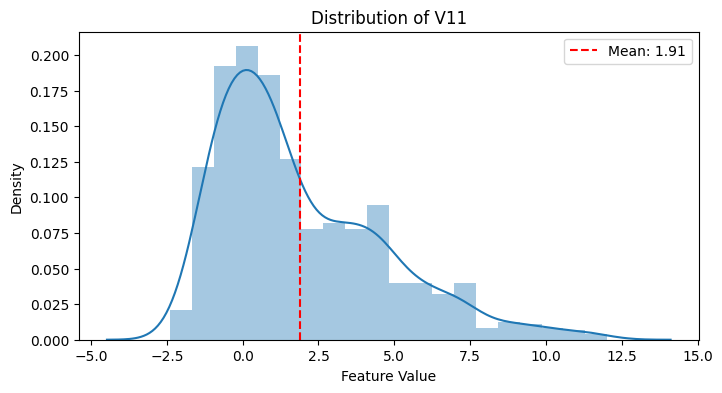

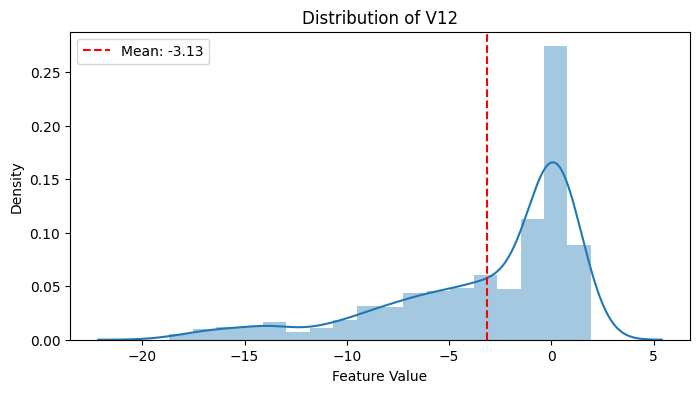

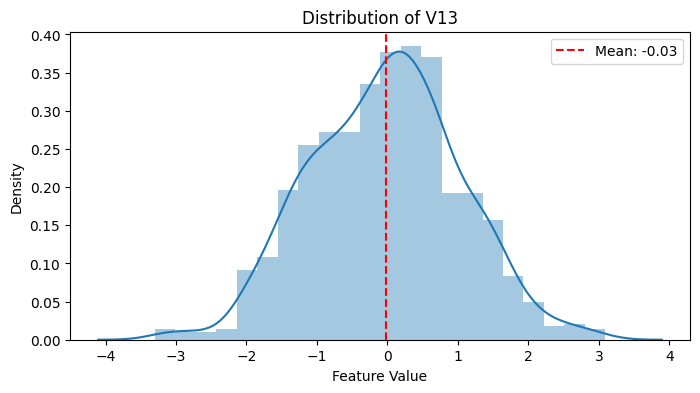

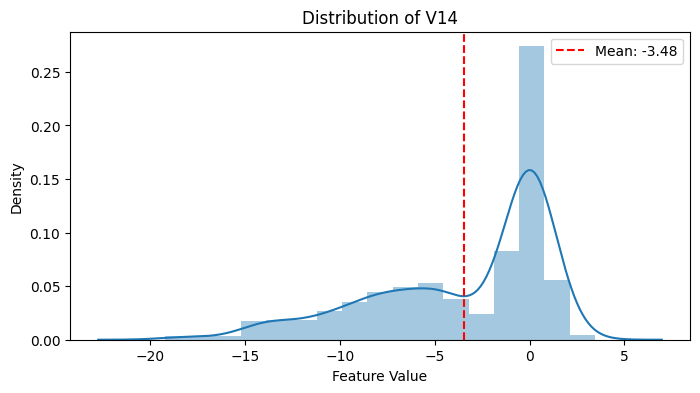

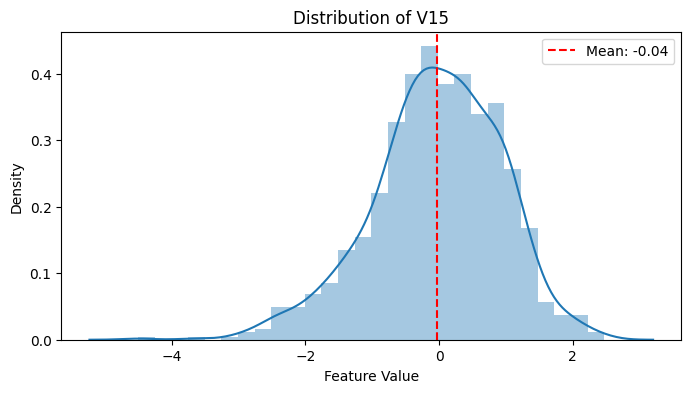

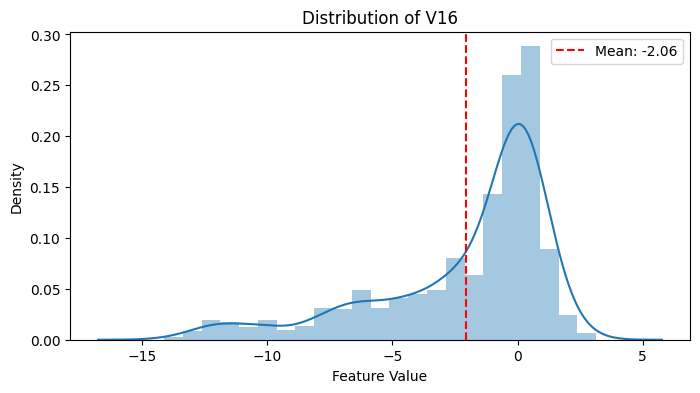

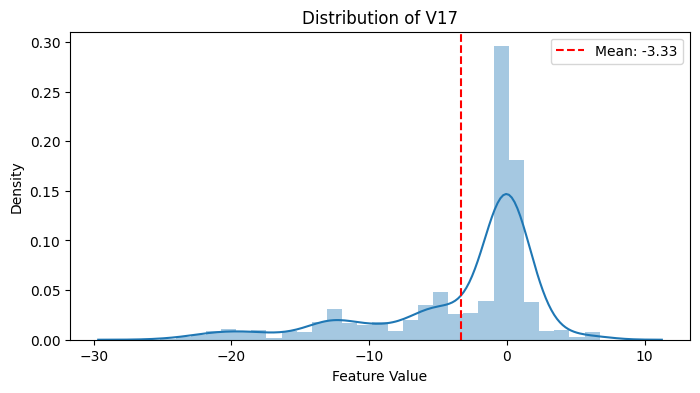

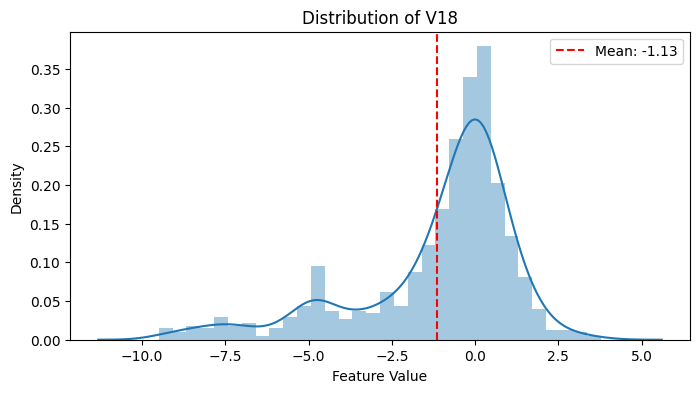

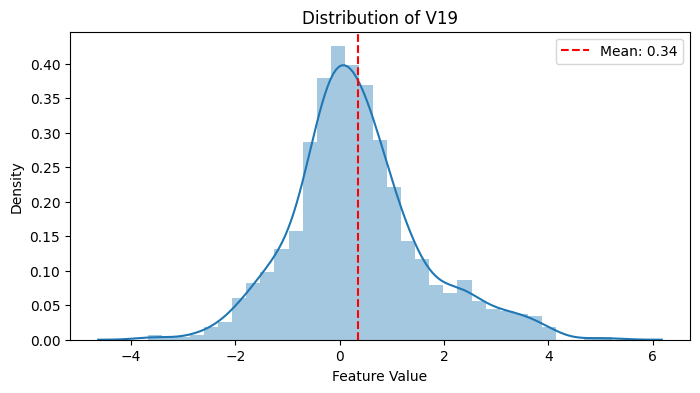

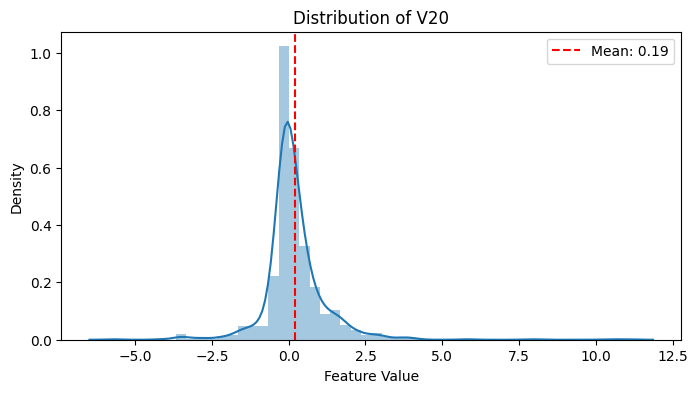

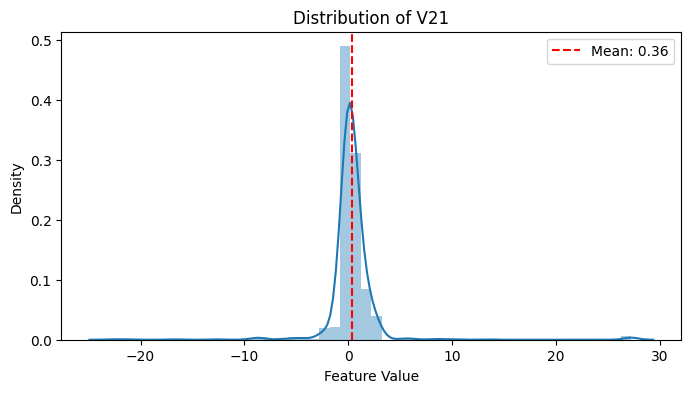

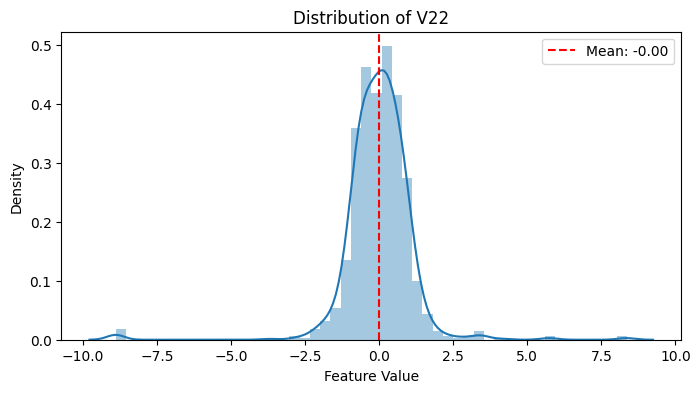

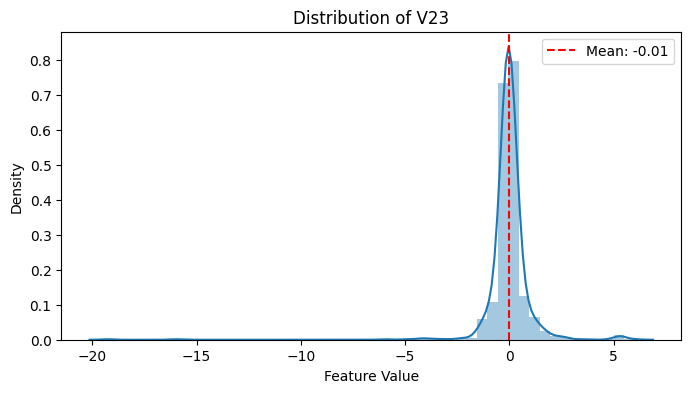

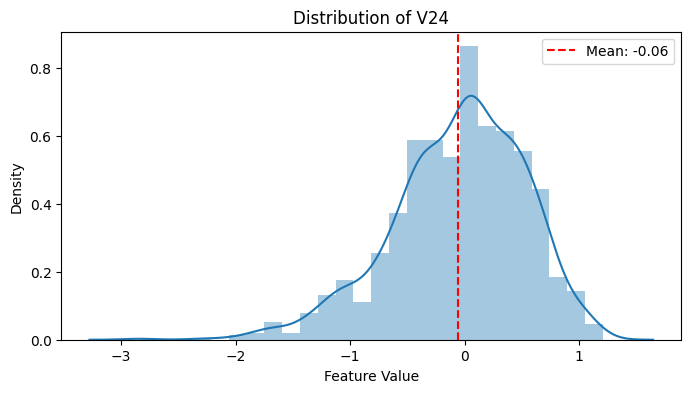

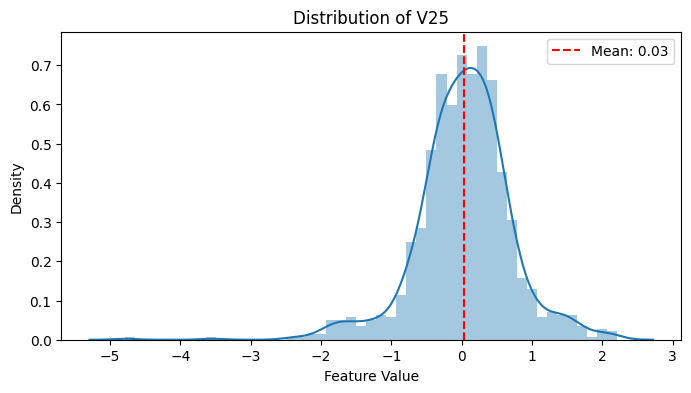

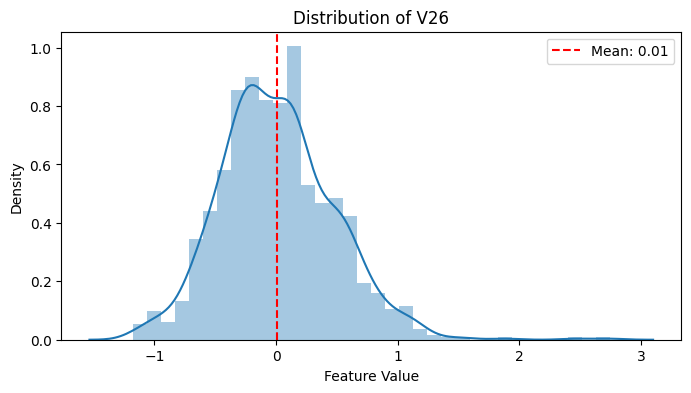

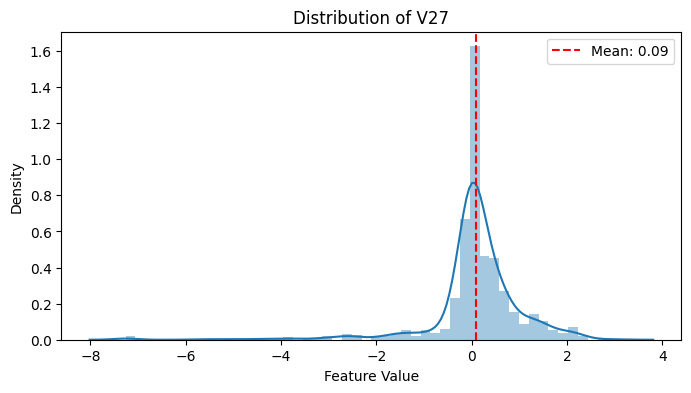

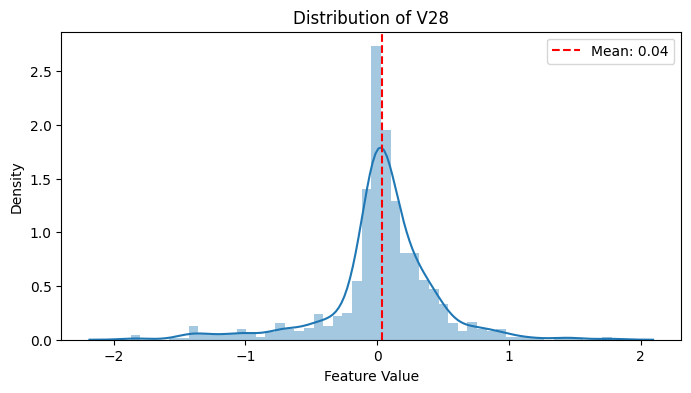

In [18]:

for col in new_df.columns[1:-2]:
    plt.figure(figsize=(8, 4))
    sns.distplot(new_df[col], kde=True)

    mean_value = new_df[col].mean()
    plt.axvline(mean_value, color='red', linestyle='--', label=f'Mean: {mean_value:.2f}')
    
    plt.title(f'Distribution of {col}')
    plt.xlabel('Feature Value')
    plt.ylabel('Density')
    
    plt.legend()
    plt.show()


In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(new_df)

scaled_df = pd.DataFrame(scaled_data, columns=new_df.columns)

scaled_df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,984.000000,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,...,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,9.840000e+02,984.000000
mean,1.010935e-16,5.776770e-17,-2.888385e-17,1.155354e-16,0.000000,2.888385e-17,5.776770e-17,5.776770e-17,2.166289e-17,-1.733031e-16,...,-7.220963e-18,2.346813e-17,-1.083144e-17,-7.220963e-18,1.173406e-17,-2.888385e-17,-1.444193e-17,1.444193e-17,5.776770e-17,0.000000
std,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,...,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509e+00,1.000509
min,-1.824027e+00,-5.116088e+00,-2.781693e+00,-4.448330e+00,-2.113761,-4.891751e+00,-3.290945e+00,-6.979541e+00,-8.510587e+00,-5.198313e+00,...,-8.258161e+00,-7.595243e+00,-1.653311e+01,-4.804762e+00,-7.114583e+00,-2.535408e+00,-7.362363e+00,-4.594033e+00,-4.569321e-01,-1.000000
25%,-8.750069e-01,-8.611499e-02,-5.356223e-01,-2.499943e-01,-0.747930,-5.480883e-02,-5.063450e-01,-4.945395e-02,-1.073876e-01,-4.624769e-01,...,-1.885321e-01,-4.603911e-01,-1.990640e-01,-5.932465e-01,-5.068506e-01,-6.579139e-01,-1.537173e-01,-2.257769e-01,-4.516085e-01,-1.000000
50%,-1.469078e-01,2.762206e-01,-2.384836e-01,3.496005e-01,-0.297789,2.865304e-01,3.138134e-02,3.666452e-01,-3.004051e-02,2.434432e-01,...,-8.091556e-02,3.355346e-02,-1.887521e-02,1.134859e-01,3.713581e-02,-5.614356e-02,-4.839097e-02,-1.131620e-02,-3.807767e-01,0.000000
75%,9.720871e-01,6.221872e-01,2.673585e-01,6.069676e-01,0.606811,4.845888e-01,4.630659e-01,5.243828e-01,1.184167e-01,6.259148e-01,...,1.038646e-01,4.760835e-01,1.771154e-01,7.567008e-01,5.437539e-01,5.917253e-01,3.649672e-01,4.224180e-01,-5.819205e-03,1.000000
max,1.751549e+00,8.443545e-01,5.509836e+00,1.077719e+00,3.074582,3.007181e+00,4.171293e+00,1.468485e+00,4.058864e+00,2.780005e+00,...,9.569398e+00,7.152112e+00,5.174778e+00,2.180425e+00,3.214223e+00,5.819832e+00,2.964780e+00,4.200452e+00,9.134102e+00,1.000000


In [20]:
new_df=scaled_df
X = new_df.drop('Class', axis=1)
y = new_df['Class']


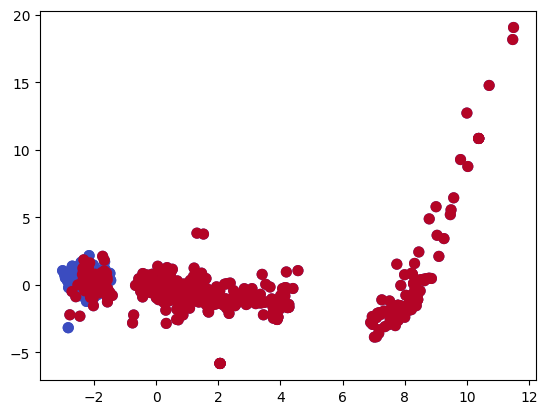

In [21]:
from sklearn.decomposition import PCA
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [24]:
logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [25]:
y_pred = logistic_regression_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.93
Confusion Matrix:
[[96  2]
 [11 88]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.90      0.98      0.94        98
         1.0       0.98      0.89      0.93        99

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197



In [26]:
from sklearn.ensemble import RandomForestClassifier


random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.93
Confusion Matrix:
[[95  3]
 [11 88]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.90      0.97      0.93        98
         1.0       0.97      0.89      0.93        99

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



In [27]:

from sklearn.preprocessing import PolynomialFeatures


features_to_poly = new_df[['V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']]


poly = PolynomialFeatures(degree=2)


poly_features = poly.fit_transform(features_to_poly)


poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out())

df_with_poly = pd.concat([new_df, poly_df], axis=1)


In [28]:
new_df=df_with_poly
X = new_df.drop('Class', axis=1)
y = new_df['Class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [29]:
from sklearn.ensemble import RandomForestClassifier


random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.93
Confusion Matrix:
[[94  4]
 [ 9 90]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.91      0.96      0.94        98
         1.0       0.96      0.91      0.93        99

    accuracy                           0.93       197
   macro avg       0.94      0.93      0.93       197
weighted avg       0.94      0.93      0.93       197

